In [58]:
import xarray as xr
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from tqdm import tqdm

In [8]:
ds_p = xr.open_dataset("/data-uerra/mescan-surfex/precipitation/mescan-surfex-nordics-precipitation_ymon.nc")

In [9]:
ds_p

<xarray.Dataset>
Dimensions:  (lat: 364, lon: 329, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2014-01-31T09:00:00 ... 2014-12-31T09:00:00
  * lon      (lon) float32 4.5 4.5835867 4.6671734 ... 31.832827 31.916414
  * lat      (lat) float32 53.5 53.549587 53.599174 ... 71.400826 71.45042 71.5
Data variables:
    tp       (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Mon Jun 10 18:51:02 2019: cdo -b 32 ymonsum -cat ./data-tem...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

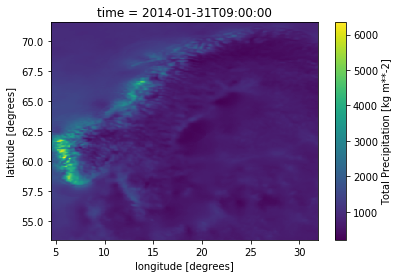

In [10]:
ds_p.tp[0,:,:].plot()

In [13]:
ds_t_avg = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-temperature-ymon.nc")

In [15]:
ds_t_std = xr.open_dataset("/data-uerra/mescan-surfex/temperature/mescan-surfex-nordics-t2m_ymonstd.nc")

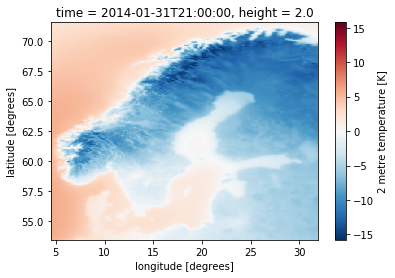

In [18]:
ds_t_avg["2t"][0,:,:].plot()

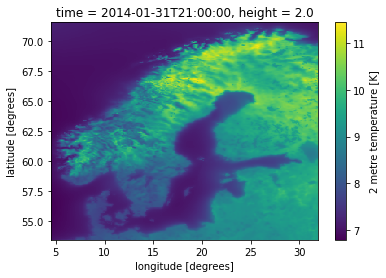

In [19]:
ds_t_std["2t"][0,:,:].plot()

In [20]:
lons, lats = np.meshgrid(ds_p.lon, ds_p.lat)

In [21]:
lons

array([[ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ],
       [ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ],
       [ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ],
       ...,
       [ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ],
       [ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ],
       [ 4.5      ,  4.5835867,  4.6671734, ..., 31.74924  , 31.832827 ,
        31.916414 ]], dtype=float32)

In [22]:
lats

array([[53.5     , 53.5     , 53.5     , ..., 53.5     , 53.5     ,
        53.5     ],
       [53.549587, 53.549587, 53.549587, ..., 53.549587, 53.549587,
        53.549587],
       [53.599174, 53.599174, 53.599174, ..., 53.599174, 53.599174,
        53.599174],
       ...,
       [71.400826, 71.400826, 71.400826, ..., 71.400826, 71.400826,
        71.400826],
       [71.45042 , 71.45042 , 71.45042 , ..., 71.45042 , 71.45042 ,
        71.45042 ],
       [71.5     , 71.5     , 71.5     , ..., 71.5     , 71.5     ,
        71.5     ]], dtype=float32)

In [23]:
psr = xr.open_dataset('../../data/sweden/mescan-surfex_pine_spruce.nc')

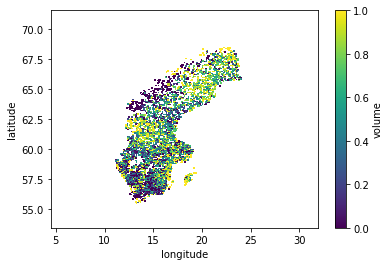

In [24]:
psr.volume.plot()

In [25]:
df = pd.DataFrame()

In [26]:
data = {
    'ratio': psr.volume.values.ravel()
}

In [33]:
for m in range(0, 12):
    data["p%02d" % (m + 1)] = ds_p.tp[m,:,:].values.ravel()
    data["tavg%02d" % (m + 1)] = ds_t_avg['2t'][m,:,:].values.ravel()
    data["tstd%02d" % (m + 1)] = ds_t_std['2t'][m,:,:].values.ravel()

In [34]:
df = pd.DataFrame(data)

In [36]:
df.dropna(inplace=True)

In [37]:
df

,ratio,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
20610,1.000000,429.878784,-3.159124,8.977105,315.316345,-3.058709,9.162731,320.702026,0.008770,8.366390,...,7.929404,659.974915,7.199598,7.973645,586.692322,3.109512,7.838320,418.880554,-1.011361,8.407584
20611,1.000000,442.777954,-3.200053,8.968402,325.709259,-3.134155,9.165648,326.748535,-0.050659,8.353924,...,7.868607,685.620667,7.169259,7.936562,606.884094,3.074059,7.828258,426.410522,-1.057354,8.404086
20618,1.000000,538.552612,-3.451118,8.970026,418.236633,-3.414907,9.228292,394.337036,-0.139035,8.284694,...,7.907936,848.545593,7.014369,7.894584,729.001770,2.832583,7.810921,608.028076,-1.313700,8.407911
20942,1.000000,463.252899,-3.333051,8.917417,325.359863,-3.325634,9.174139,312.334717,-0.218715,8.349739,...,7.831909,693.957581,7.035167,7.874893,620.472229,2.913463,7.800209,424.497833,-1.212814,8.375235
20944,1.000000,490.131927,-3.450393,8.920228,351.633484,-3.428852,9.170031,329.970459,-0.275601,8.300670,...,7.839651,733.510986,6.922132,7.865607,653.869446,2.789304,7.798604,471.054352,-1.335296,8.381094
20945,1.000000,501.725555,-3.483822,8.925842,371.691162,-3.453713,9.172757,346.131470,-0.270533,8.283085,...,7.869539,765.683472,6.895701,7.874566,673.923523,2.752209,7.799711,508.990540,-1.367794,8.384460
20947,1.000000,515.851929,-3.411430,8.962617,400.957672,-3.404904,9.226817,375.259399,-0.140471,8.279243,...,7.913436,821.498596,7.025792,7.888004,702.141296,2.846200,7.805460,580.670654,-1.277919,8.405258
21242,1.000000,594.064270,1.384664,7.364354,478.088135,0.674517,7.565238,361.380981,1.788915,6.931048,...,6.956784,915.675781,10.905535,7.009216,929.825500,6.948653,7.104650,815.250366,3.573391,7.284350
21243,1.000000,595.932068,1.335307,7.395878,473.066498,0.629479,7.588570,357.921326,1.768772,6.937312,...,6.959473,918.628540,10.900887,7.016498,927.331604,6.938839,7.115607,816.385193,3.548521,7.308131
21264,1.000000,517.812378,-3.046395,8.884859,394.590515,-3.046294,9.104841,381.630249,-0.161384,8.360133,...,7.907536,742.027771,7.157871,7.948193,673.465515,3.109463,7.806489,530.825256,-0.911717,8.388577


In [38]:
df = df[df["ratio"] > 0]

In [39]:
df.head()

,ratio,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
20610,1.0,429.878784,-3.159124,8.977105,315.316345,-3.058709,9.162731,320.702026,0.008770,8.366390,...,7.929404,659.974915,7.199598,7.973645,586.692322,3.109512,7.838320,418.880554,-1.011361,8.407584
20611,1.0,442.777954,-3.200053,8.968402,325.709259,-3.134155,9.165648,326.748535,-0.050659,8.353924,...,7.868607,685.620667,7.169259,7.936562,606.884094,3.074059,7.828258,426.410522,-1.057354,8.404086
20618,1.0,538.552612,-3.451118,8.970026,418.236633,-3.414907,9.228292,394.337036,-0.139035,8.284694,...,7.907936,848.545593,7.014369,7.894584,729.001770,2.832583,7.810921,608.028076,-1.313700,8.407911
20942,1.0,463.252899,-3.333051,8.917417,325.359863,-3.325634,9.174139,312.334717,-0.218715,8.349739,...,7.831909,693.957581,7.035167,7.874893,620.472229,2.913463,7.800209,424.497833,-1.212814,8.375235
20944,1.0,490.131927,-3.450393,8.920228,351.633484,-3.428852,9.170031,329.970459,-0.275601,8.300670,...,7.839651,733.510986,6.922132,7.865607,653.869446,2.789304,7.798604,471.054352,-1.335296,8.381094


In [40]:
df.columns[1:]

Index(['p01', 'tavg01', 'tstd01', 'p02', 'tavg02', 'tstd02', 'p03', 'tavg03',
       'tstd03', 'p04', 'tavg04', 'tstd04', 'p05', 'tavg05', 'tstd05', 'p06',
       'tavg06', 'tstd06', 'p07', 'tavg07', 'tstd07', 'p08', 'tavg08',
       'tstd08', 'p09', 'tavg09', 'tstd09', 'p10', 'tavg10', 'tstd10', 'p11',
       'tavg11', 'tstd11', 'p12', 'tavg12', 'tstd12'],
      dtype='object')

In [41]:
rf = RandomForestRegressor(n_estimators=500, max_depth=15)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [43]:
X_train

,p01,tavg01,tstd01,p02,tavg02,tstd02,p03,tavg03,tstd03,p04,...,tstd09,p10,tavg10,tstd10,p11,tavg11,tstd11,p12,tavg12,tstd12
43933,678.280701,0.021415,7.273611,480.072876,-1.046978,7.738179,414.228271,0.260105,7.096096,452.824951,...,7.056838,845.692078,8.763954,7.066042,1002.882385,4.887693,7.242915,889.882629,1.783950,7.399110
84307,1435.855713,3.249456,7.198524,1345.543701,2.291692,7.706579,1238.171021,3.012208,7.111188,815.690430,...,6.895162,1349.333984,8.474828,7.023655,1388.732910,5.729441,7.289025,1601.194580,3.807325,7.409359
36356,626.910645,0.582174,7.337995,560.674927,-0.133723,7.662206,382.070465,1.155796,7.117813,422.049927,...,7.111527,950.553162,9.356826,7.127175,1013.570557,5.373820,7.285609,874.438782,2.154814,7.564950
46874,646.245117,-2.866503,8.470330,594.865479,-2.811573,8.766150,488.566742,-0.687306,8.485863,442.518127,...,7.938828,943.594666,6.283335,7.883484,991.437073,2.430110,7.844062,817.527039,-1.381105,8.469118
92212,1110.199951,3.215252,7.063687,977.466858,2.300250,7.420000,850.640564,2.604039,7.007656,624.301392,...,6.887442,1243.286865,8.189458,6.983094,1288.995361,5.769096,7.198053,1260.625000,3.941804,7.180197
90239,1211.023682,2.942320,7.104188,1011.843689,2.035915,7.509830,893.396790,2.516030,7.030825,693.238525,...,6.884302,1262.946167,8.186097,6.994286,1318.376221,5.596630,7.215544,1345.079346,3.657482,7.247068
99457,1431.131958,3.839926,7.021855,1172.618774,2.879276,7.334417,1227.195923,2.815125,6.938218,824.586365,...,6.900307,1421.537354,8.157917,6.951944,1625.744019,6.014343,7.149884,1675.502075,4.459171,7.088185
85302,1746.100098,2.331704,7.321175,1564.780518,1.369165,7.857274,1519.823853,2.339911,7.162368,1104.058594,...,6.926895,2102.123291,8.162717,7.100872,1848.147095,5.194681,7.372664,2070.399414,3.001081,7.536957
80428,607.661438,-10.055580,10.114220,519.705383,-10.319079,10.671712,407.982819,-6.526172,9.582413,336.411804,...,7.896328,794.288269,0.977912,8.102751,691.115784,-4.430865,8.779332,745.752014,-8.541627,10.199750
80092,703.711975,-9.831085,9.455319,658.315613,-10.442523,10.231076,517.953674,-7.051271,9.070952,451.542542,...,7.785897,872.307373,0.370542,7.889482,854.755066,-4.453735,8.334713,851.175232,-8.456904,9.660712


In [44]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
mean_squared_error(y_test, y_pred)

0.07757682449830425

In [47]:
r2_score(y_test, y_pred)

0.10178800441855174

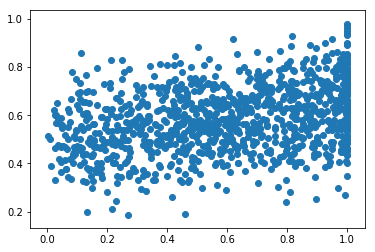

In [48]:
plt.scatter(y_test, y_pred)

In [49]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [50]:
df_results

,observed,predicted
33127,0.194676,0.627229
66238,1.000000,0.790617
36346,0.446925,0.730521
100123,0.071271,0.343934
81362,0.179895,0.357620
83705,0.266445,0.539219
52144,0.754461,0.413088
50147,0.743654,0.456693
49501,0.456800,0.605860
99464,0.485930,0.574656


In [55]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)   

In [56]:
feature_importances

,importance
p10,0.088251
tstd06,0.040433
p11,0.039596
p06,0.037157
tstd09,0.036149
p08,0.034285
p02,0.033697
p09,0.032546
p07,0.032542
p04,0.032140


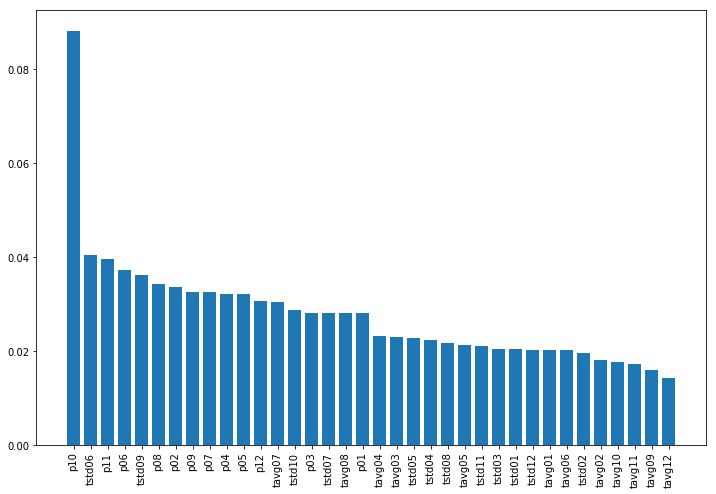

In [57]:
plt.figure(figsize=(12,8))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()